In [3]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme()

In [4]:
clubb_dir='/home/tsw35/tyche/clubb'

In [49]:
#### READ IN THE FORCING DATA ####
def read_forcings(path,nz_=37):
    fp = open(path,'r')
    lines=fp.readlines()
    # determine number of timesteps first 
    t = 0
    for line in lines:
        if line[0]=='!':
            continue
        lsp = line.split(' ')
        if (lsp[1]==str(nz_) or (lsp[1]==(str(nz_)+'\n'))):
            t = t+1
    data={}
    headbool=True
    ti = -1
    alt = 0
    for line in lines:
        if line[0]=='!':
            continue
        if headbool:
            headbool = False
            lsp = line.split(' ')
            head_0 = [x for x in lsp if x != '']
            n = len(head_0)
            head=[]
            for x in head_0:
                if '\n' in x:
                    x = x[0:-1]
                head.append(x)
                data[x]=np.zeros((t,37))
            data['time']=[]
            continue
        lsp = line.split(' ')
        if (lsp[1]==str(nz_) or (lsp[1]==(str(nz_)+'\n'))):
            data['time'].append(float(lsp[0]))
            ti=ti+1
            alt=0
            continue
        for i in range(n):
            x = head[i]
            data[x][ti,alt]=float(lsp[i])
        alt=alt+1
    data['time']=np.array(data['time'])
    return data

In [4]:
cpldir = '../test_cpl/k_2/'
rst_dir = '../rst_nodelta/'
norst = '../no_rst/'
frc_c1 = cpldir+'c_1/input/case_setups/arm_forcings.in'
frc_c2 = cpldir+'c_2/input/case_setups/arm_forcings.in'
frc_o  = rst_dir+'/k_1/c_1/input/case_setups/arm_forcings.in'
d_c1 = read_forcings(frc_c1) 
d_c2 = read_forcings(frc_c2) 
d_o  = read_forcings(frc_o) 

In [5]:
d_c1 = read_forcings(frc_c1) 
d_c2 = read_forcings(frc_c2) 
d_o  = read_forcings(frc_o) 

181
181
193


In [6]:
for k in d_c1.keys():
    print(k)

Press[Pa]
T_f[K\s]
rtm_f[kg\kg\s]
um_ref[m\s]
vm_ref[m\s]
um_f[m\s^2]
vm_f[m\s^2]
omega[Pa\s]
ug[m\s]
vg[m\s]
time


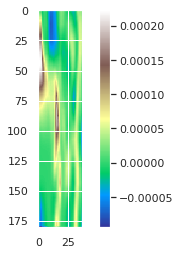

In [7]:
plt.imshow(d_c1['T_f[K\s]'],cmap='terrain')
plt.colorbar()

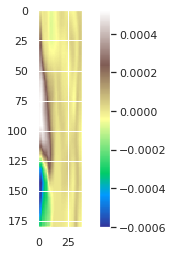

In [8]:
plt.imshow(d_c2['T_f[K\s]'],cmap='terrain')
plt.colorbar()

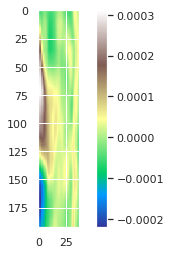

In [9]:
plt.imshow(d_o['T_f[K\s]'],cmap='terrain')
plt.colorbar()

In [11]:
var = 'T_f[K\s]' 

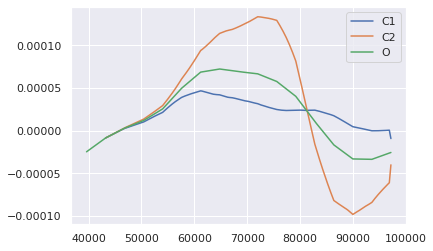

In [36]:
plt.plot(d_c1['time'],np.mean(d_c1[var],axis=1))
plt.plot(d_c2['time'],np.mean(d_c2[var],axis=1))
plt.plot(d_o['time'],np.mean(d_o[var],axis=1))
plt.legend(['C1','C2','O'])

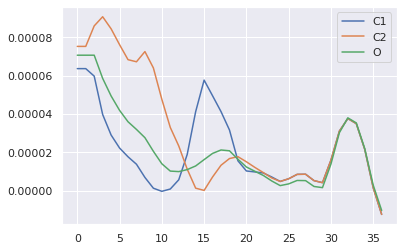

In [18]:
plt.plot(np.mean(d_c1[var],axis=0))
plt.plot(np.mean(d_c2[var],axis=0))
plt.plot(np.mean(d_o[var],axis=0))
plt.legend(['C1','C2','O'])

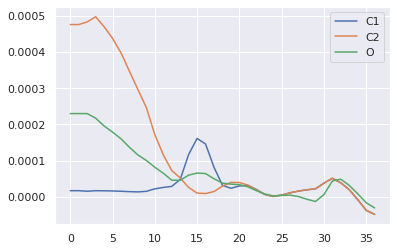

In [17]:
plt.plot(d_c1[var][100,:])
plt.plot(d_c2[var][100,:])
plt.plot(d_o[var][100,:])
plt.legend(['C1','C2','O'])

In [35]:
np.mean(np.abs(d_c1['T_f[K\s]']-d_c2['T_f[K\s]'])/np.abs(d_o['T_f[K\s]'][12:,:]))

0.7445406868718725

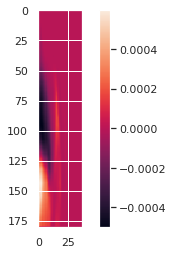

In [19]:
plt.imshow(d_c1['T_f[K\s]']-d_c2['T_f[K\s]'])
plt.colorbar()

In [20]:
fp = nc.Dataset(cpldir+'c_2/restart/arm_zt.nc','r')

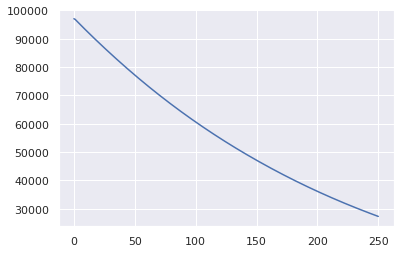

In [21]:
plt.plot(fp['p_in_Pa'][0,:,0,0])

In [27]:
##### COMPARE RESTART RUN vs NORMAL ##### #2017716
rst_rundir = clubb_dir+'/rst_nodelta/k_1/c_1/'
norm_rundir = clubb_dir+'/no_rst/k_1/c_1/'
fp_rst = nc.Dataset(rst_rundir+'output/arm_sfc.nc')
fp_nrm = nc.Dataset(norm_rundir+'output/arm_sfc.nc')

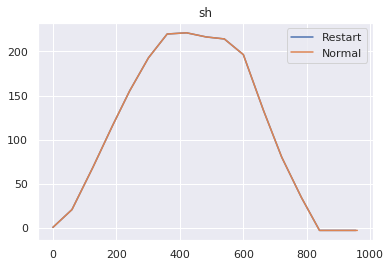

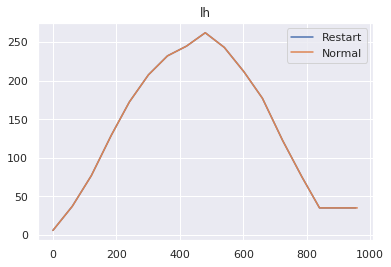

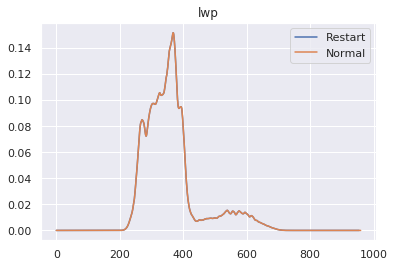

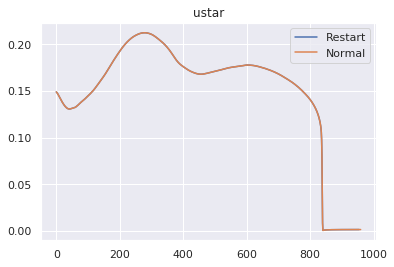

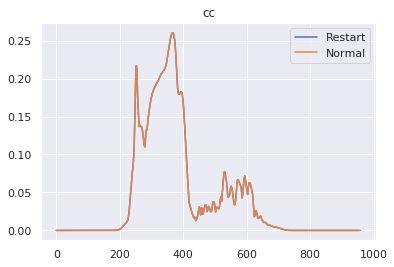

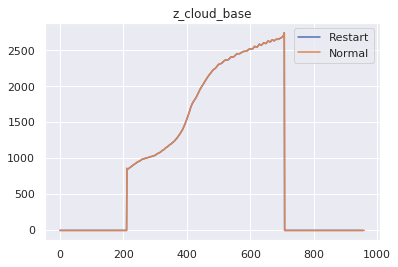

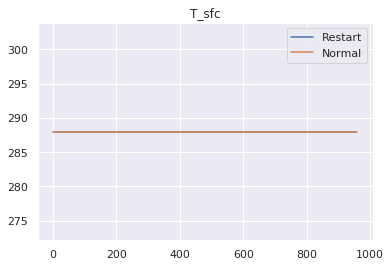

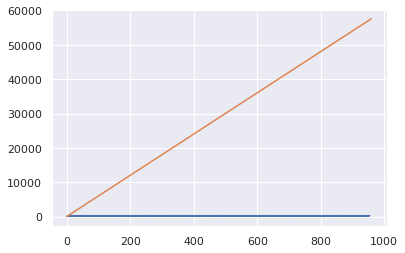

In [28]:
for k in fp_rst.variables:
    if k in ['latitude','longitude','altitude','time']:
        continue
    plt.figure()
    plt.plot(fp_rst[k][:,0,0,0])
    plt.plot(fp_nrm[k][:,0,0,0])
    plt.title(k)
    plt.legend(['Restart','Normal'])
plt.figure()
plt.plot(fp_rst['time'][:])
plt.plot(fp_nrm['time'][:])

In [41]:
fp_nocpl = nc.Dataset('../sgp_2017716/k_2/agg_outsfc.nc','r')
fp_cpl = nc.Dataset('../test_cpl/k_2/agg_outsfc.nc','r')
fp_cpl2 = nc.Dataset('../test_cpl2/k_2/agg_outsfc.nc','r')
fp_cpl3 = nc.Dataset('../test_cpl3/k_2/agg_outsfc.nc','r')

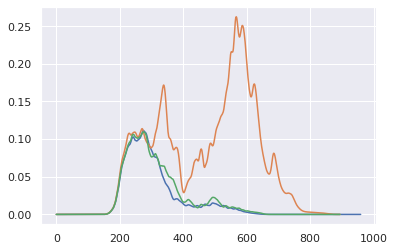

In [42]:
plt.plot(fp_nocpl['lwp'][:,0,0,0])
plt.plot(fp_cpl['lwp'][:,0,0,0])
plt.plot(fp_cpl2['lwp'][:,0,0,0])

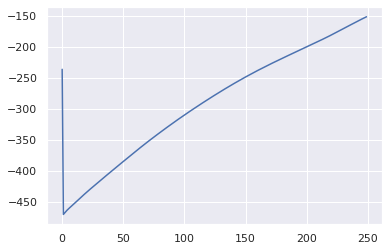

In [11]:
fp_cpl = nc.Dataset(clubb_dir+'/sgp_cpl/sgp_201745/k_2/agg_outzt.nc','r')
plt.plot(fp_cpl['p_in_Pa'][100,1:,0,0]-fp_cpl['p_in_Pa'][100,:-1,0,0])

In [25]:
fp_cpl = nc.Dataset(clubb_dir+'/test_cpl4/k_2/c_1/output/arm_zt.nc','r')
fp_cpl['p_in_Pa'].shape

(5, 7, 1, 1)

In [21]:
a = np.ones((2,3,4))
print(np.sum(a,axis=(1,2)))
print(a.shape)

[12. 12.]
(2, 3, 4)


/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplo

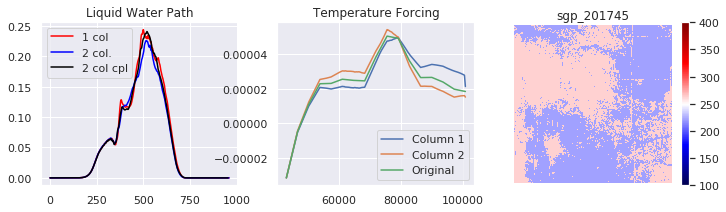

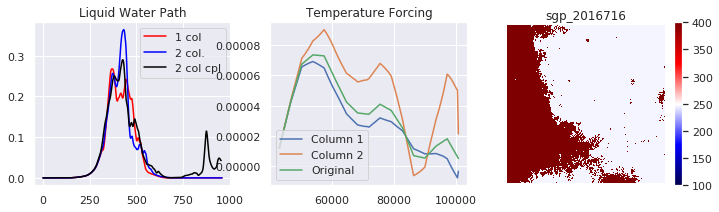

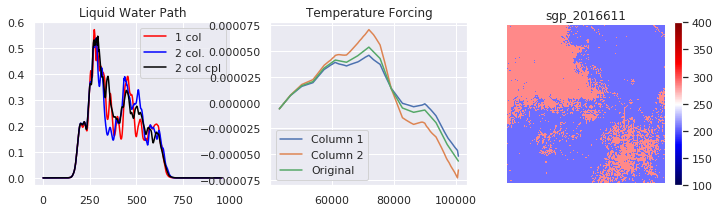

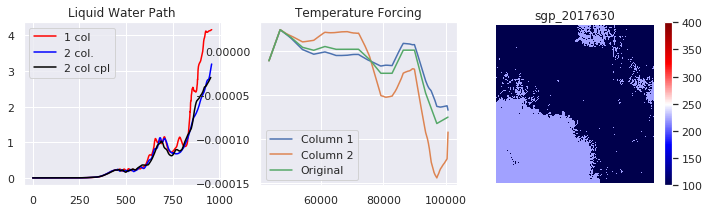

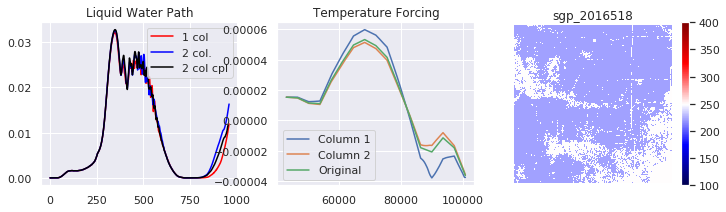

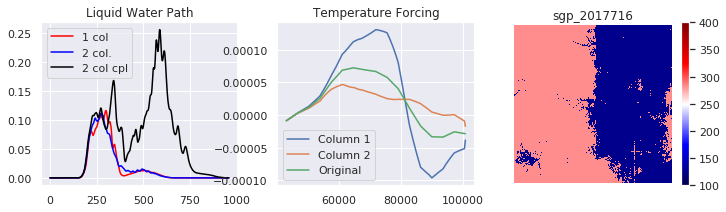

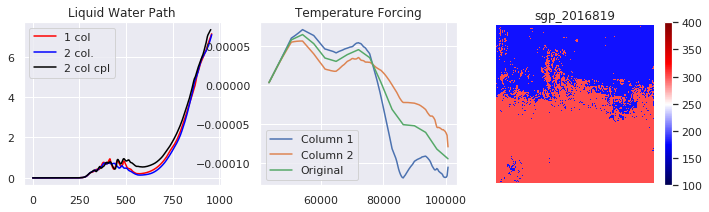

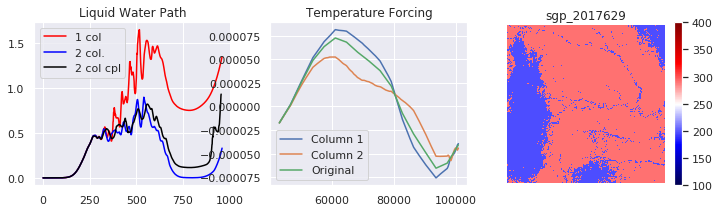

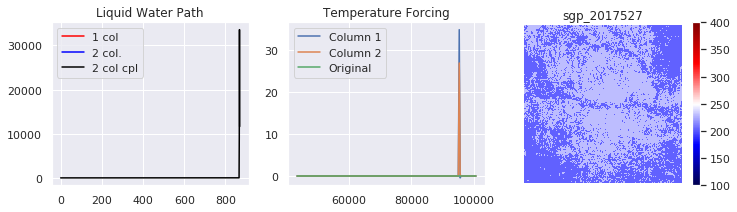

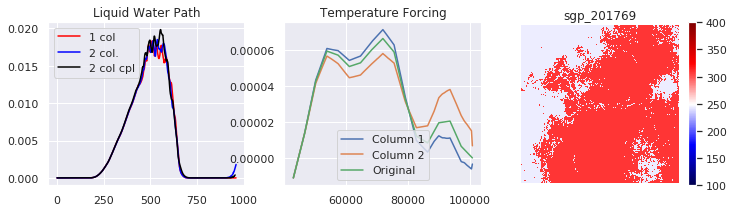

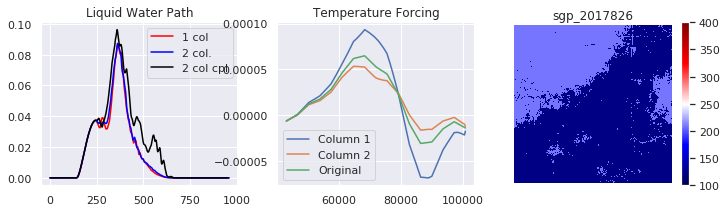

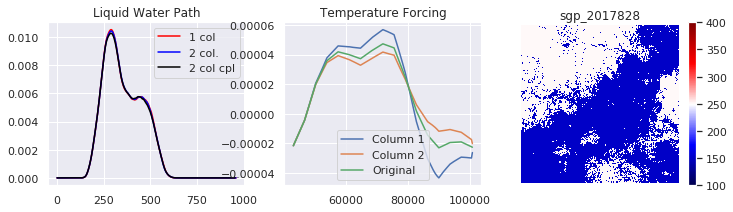

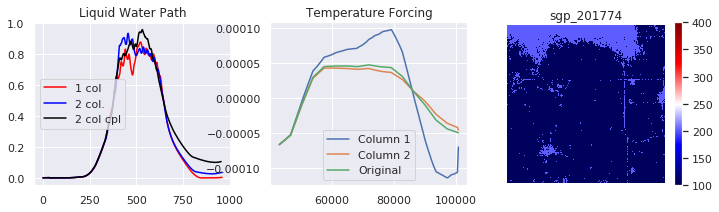

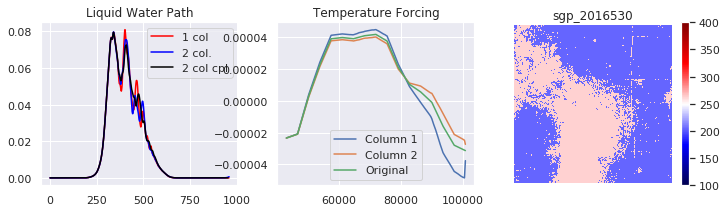

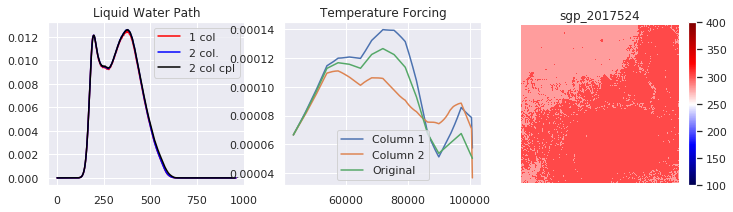

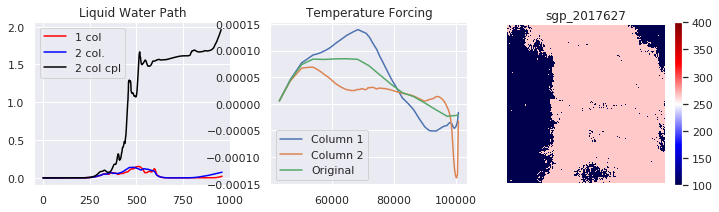

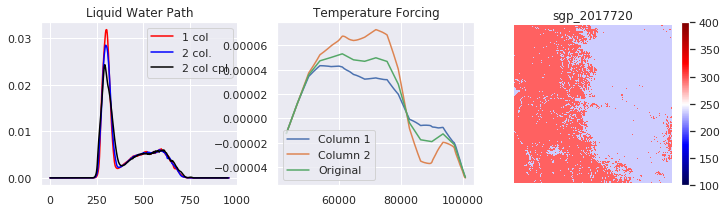

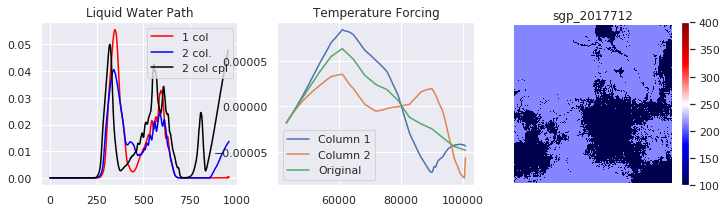

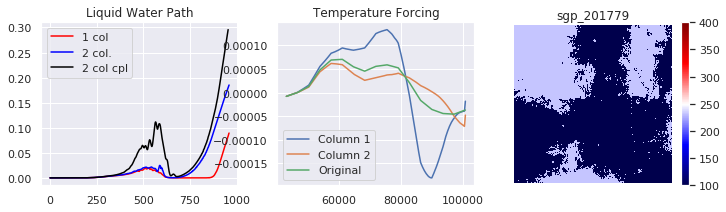

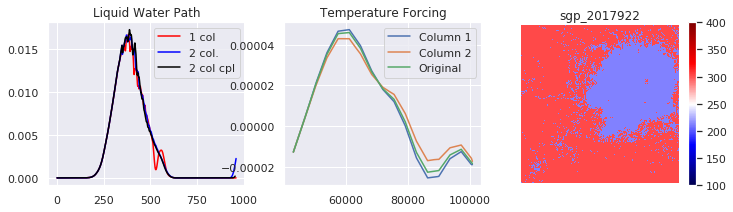

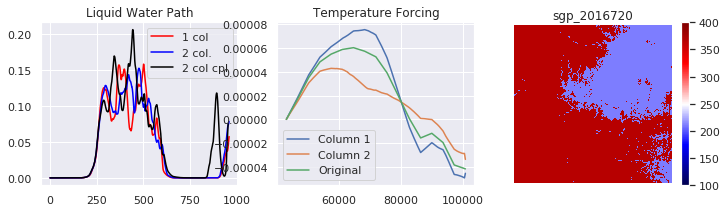

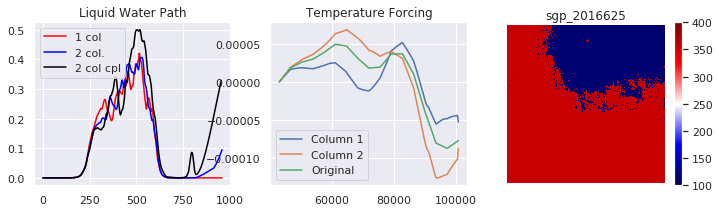

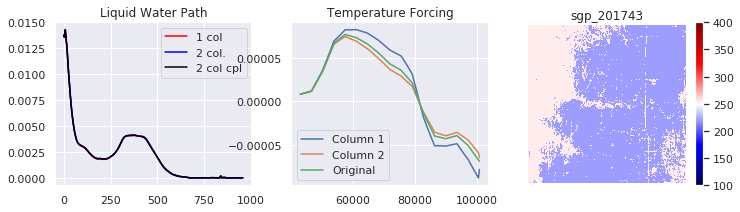

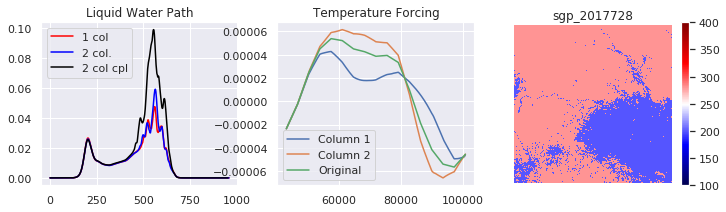

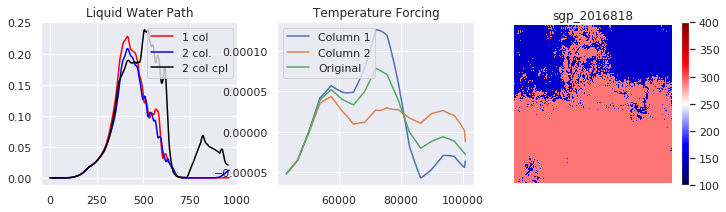

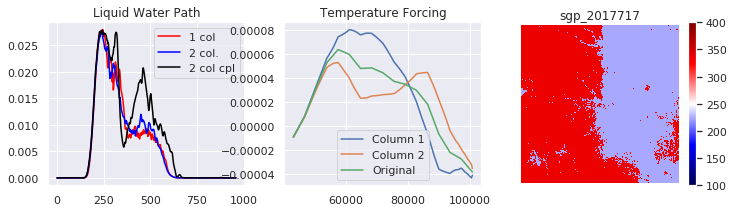

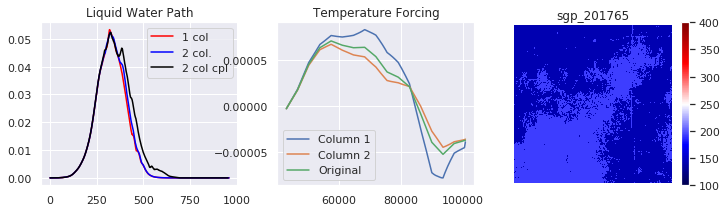

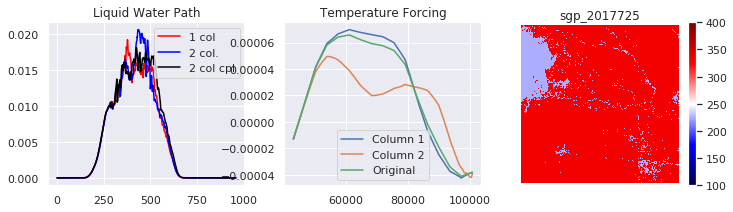

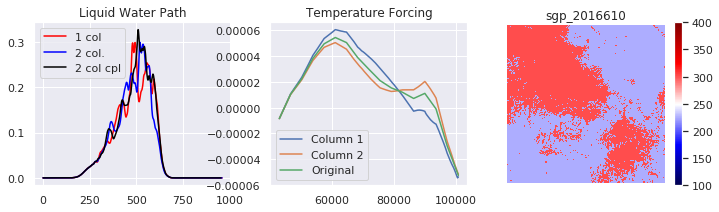

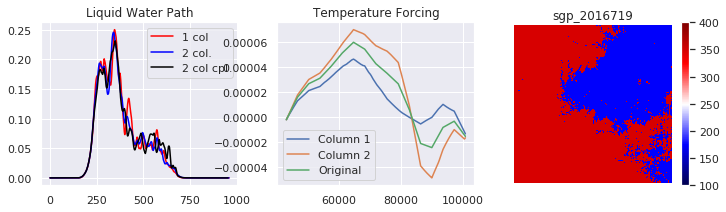

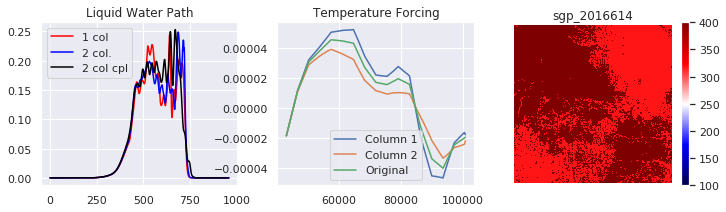

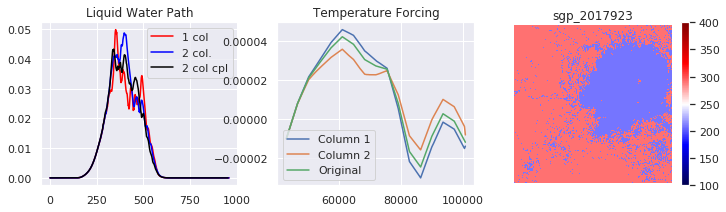

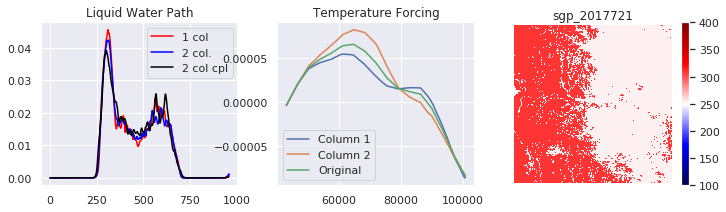

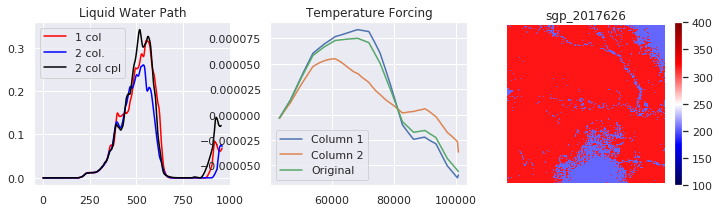

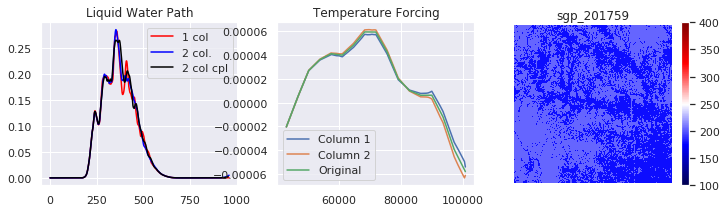

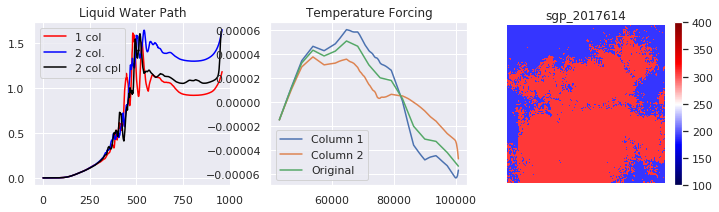

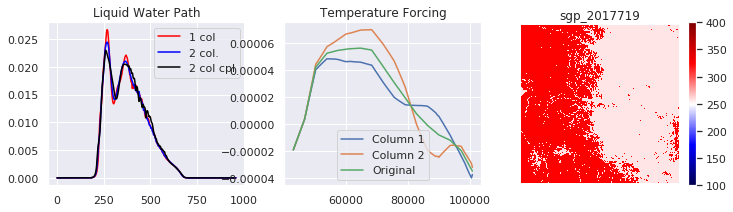

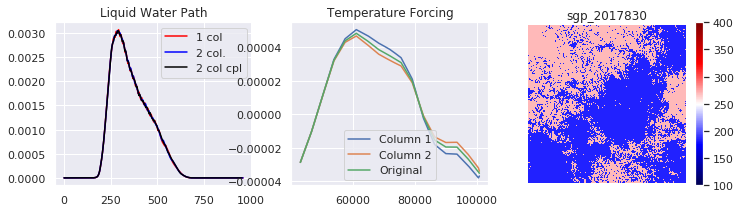

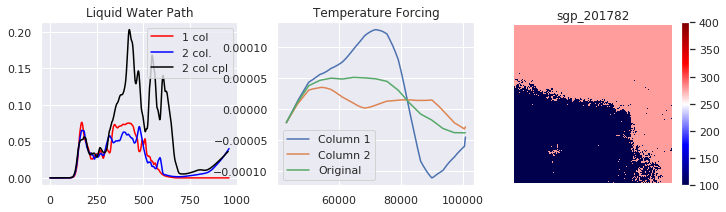

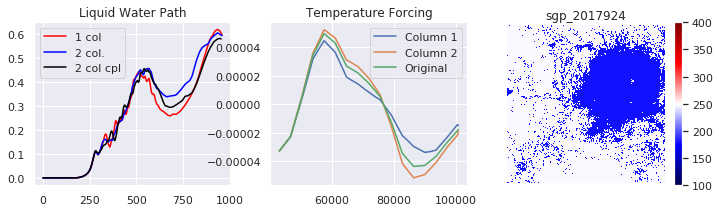

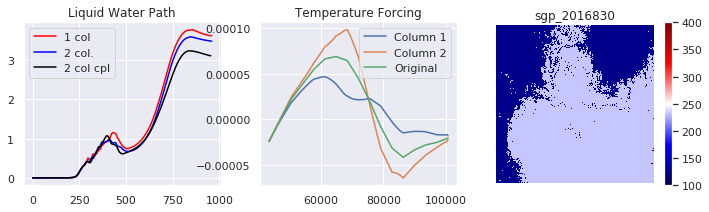

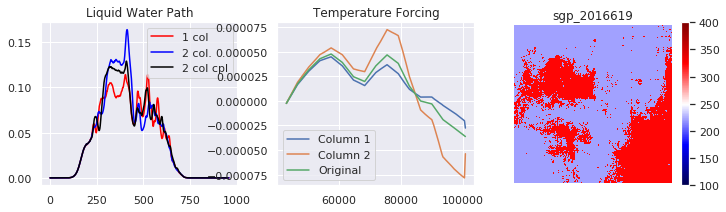

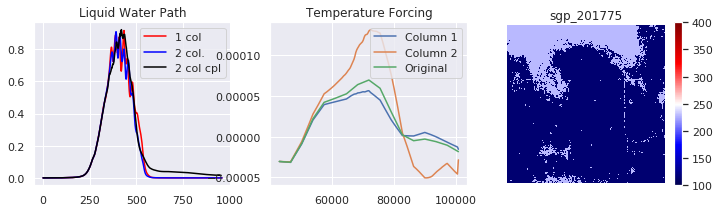

In [68]:
for file in os.listdir(clubb_dir):
    if 'sgp_2' not in file:
        continue
    fp_nocpl = nc.Dataset(clubb_dir+'/'+file+'/k_2/agg_outsfc.nc','r')
    fp_1col = nc.Dataset(clubb_dir+'/'+file+'/k_1/agg_outsfc.nc')
    fp_cpl = nc.Dataset(clubb_dir+'/sgp_cpl/'+file+'/k_2/agg_outsfc.nc','r')
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.plot(fp_1col['lwp'][:,0,0,0],c='red')
    plt.plot(fp_nocpl['lwp'][:,0,0,0],c='blue')
    plt.plot(fp_cpl['lwp'][:,0,0,0],c='black')
    plt.legend(['1 col','2 col.','2 col cpl'])
    plt.title('Liquid Water Path')
    plt.subplot(1,3,2)
    frc_c1 = clubb_dir+'/sgp_cpl/'+file+'/k_2/c_1/input/case_setups/arm_forcings.in'
    frc_c2 = clubb_dir+'/sgp_cpl/'+file+'/k_2/c_2/input/case_setups/arm_forcings.in'
    frc_o  = clubb_dir+'/'+file+'/k_1/c_1/input/case_setups/arm_forcings.in'
    d_c1 = read_forcings(frc_c1) 
    d_c2 = read_forcings(frc_c2) 
    d_o  = read_forcings(frc_o) 
    plt.plot(d_c1['time'],np.mean(d_c1[var],axis=1))
    plt.plot(d_c2['time'],np.mean(d_c2[var],axis=1))
    plt.plot(d_o['time'],np.mean(d_o[var],axis=1))
    plt.legend(['Column 1','Column 2','Original'])
    plt.title('Temperature Forcing')
    plt.subplot(1,3,3)
    fp_clst = nc.Dataset(clubb_dir+'/sgp_cpl/'+file+'/k_2/clusters.nc','r')
    tindex=7
    clust=fp_clst['cluster'][tindex,:,:]
    mheat=[]
    H = fp_clst['H'][tindex,:,:]
    nmax=np.max(clust)
    for j in range(int(nmax+1)):
        mheat.append(np.mean(fp_clst['H'][tindex,:,:][clust==j]))
        clust[clust==j]=mheat[j]
    plt.imshow(clust,cmap='seismic',vmin=100,vmax=400)
    plt.grid(False)
    plt.axis('off')
    plt.title(file)
    plt.colorbar()
    continue